<a href="https://colab.research.google.com/github/AJPardhiv/ML-Lab/blob/master/2420080001_WEEK2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Load a Dataset andK-fold Cross Validation and Average Accuracy Accross Fields**


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
iris = load_iris()
x, y = iris.data, iris.target
def k_fold_cv(x, y, k=5, n_neighbors=3):
    fold_size = len(x) // k
    accuracies = []
    for i in range(k):
        start, end = i * fold_size, (i + 1) * fold_size
        x_test, y_test = x[start:end], y[start:end]
        x_train = np.concatenate([x[:start], x[end:]])
        y_train = np.concatenate([y[:start], y[end:]])
        knn = KNeighborsClassifier(n_neighbors=n_neighbors)
        knn.fit(x_train, y_train)
        y_pred = knn.predict(x_test)
        accuracies.append(accuracy_score(y_test, y_pred))
    return accuracies, np.mean(accuracies)
fold_acc, avg_accuracy = k_fold_cv(x, y, k=5)
print("Fold-wise accuracies:", fold_acc)
print(f"Average k-NN accuracy (k-fold CV): {avg_accuracy:.3f}")



Fold-wise accuracies: [1.0, 1.0, 0.8333333333333334, 0.9333333333333333, 0.7666666666666667]
Average k-NN accuracy (k-fold CV): 0.907


# BootStrap Sampling for Linear Regression and Confidence Intervals **Plot**


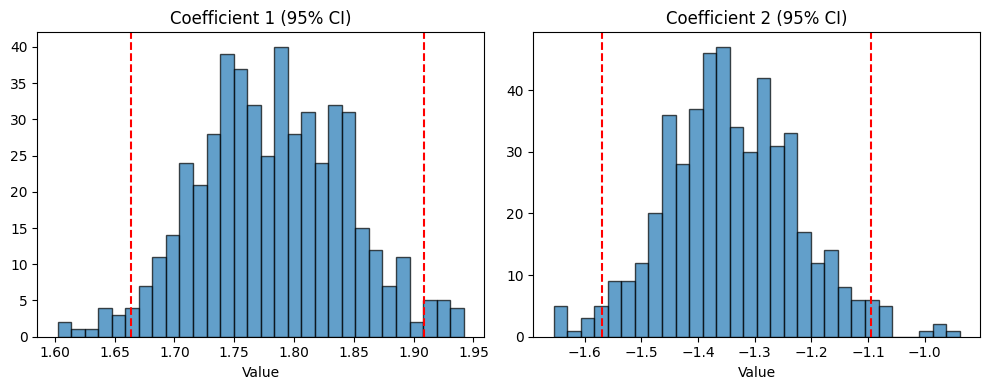


Bootstrap results (95% confidence intervals):
Coefficient 1: [1.664, 1.908]
Coefficient 2: [-1.569, -1.095]


In [ ]:
def bootstrap_regression(x,y,n_bootstraps=1000):
  n_samples=len(x)
  coefs=[]
  for _ in range(n_bootstraps):
    indices=np.random.choice(n_samples,n_samples,replace=True)
    x_boot=x[indices]
    y_boot=y[indices]
    model = LinearRegression()
    model.fit(x_boot,y_boot)
    coefs.append(model.coef_)
  return np.array(coefs)
x_reg=x[:,:2]
y_reg=x[:,2]
coefs=bootstrap_regression(x_reg,y_reg,n_bootstraps=500)
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.hist(coefs[:, 0], bins=30, alpha=0.7, edgecolor='black')
plt.axvline(np.percentile(coefs[:, 0], 2.5), color='red', linestyle='--')
plt.axvline(np.percentile(coefs[:, 0], 97.5), color='red', linestyle='--')
plt.title('Coefficient 1 (95% CI)')
plt.xlabel('Value')

plt.subplot(1, 2, 2)
plt.hist(coefs[:, 1], bins=30, alpha=0.7, edgecolor='black')
plt.axvline(np.percentile(coefs[:, 1], 2.5), color='red', linestyle='--')
plt.axvline(np.percentile(coefs[:, 1], 97.5), color='red', linestyle='--')
plt.title('Coefficient 2 (95% CI)')
plt.xlabel('Value')

plt.tight_layout()
plt.show()

print("\nBootstrap results (95% confidence intervals):")
for i in range(coefs.shape[1]):
    lower = np.percentile(coefs[:, i], 2.5)
    upper = np.percentile(coefs[:, i], 97.5)
    print(f"Coefficient {i+1}: [{lower:.3f}, {upper:.3f}]")

